# Установка библиотек

In [184]:
import pandas as pd #для работы с таблицами

Для автоматического применения статистического критерия (теста) используется модуль `stats` библиотеки `scipy`.

Этот модуль содержит большое количество вероятностных распределений, корреляционные функции и статистические тесты и многое другое.

Также активно используется библиотека `statsmodels`

Для установки библиотеки `scipy` и `statsmodels` можно воспользоваться менеджером пакетов `pip`.

In [ ]:
!pip install scipy

In [186]:
!pip install statsmodels


# Загрузка данных

Для скачивания данных используем команду `!wget`. 

Данные появятся в локальной директории.

Мы будем использовать информацию о диаметре пицц разных производителей.

In [1]:
!wget https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv

--2022-04-27 22:42:57--  https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 539 [text/plain]
Сохранение в: «pizzas.csv»

pizzas.csv          100%[===================>]     539  --.-KB/s    за 0s      

2022-04-27 22:42:58 (27,1 MB/s) - «pizzas.csv» сохранён [539/539]



Загрузим данные в память ноутбука.

In [188]:
data = pd.read_csv('data/pizzas.csv')

In [189]:
data.rename(columns={'Making Unit 1': 'Пиццерия №1', 'Making Unit 2': 'Пиццерия №2'}, inplace=True)

In [190]:
data.head()

,Пиццерия №1,Пиццерия №2
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


# Проверка данных на нормальность


In [191]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [192]:
alpha = 0.05

## Тест Шапиро-Уилка

In [193]:
from scipy.stats import shapiro

In [194]:
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.204
Данные распределены нормально


## Тест Д’Агостино

In [195]:
from scipy.stats import normaltest

In [196]:
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.251
Данные распределены нормально


# Независимый T-тест 

In [197]:
from scipy.stats import ttest_ind

In [198]:
H0 = 'Нет значимой разницы между диаметрами пиццы в разных пиццериях.'
Ha = 'Есть значимая разница между диаметрами пиццы в разных пиццериях.'

Зависимая переменная (диаметр пиццы) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [199]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['Пиццерия №1'], data['Пиццерия №2'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.47 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между диаметрами пиццы в разных пиццериях.


-----

# Корреляция Спирмана 

In [200]:
from numpy.random import rand
from scipy.stats import spearmanr

data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)


corr, p = spearmanr(data1, data2)

In [201]:
print(corr,p)

0.8995594795594796 0.0


In [202]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.


# ANOVA тест

In [203]:
from scipy.stats import f_oneway

Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.

В качестве данных возьмем информацию по размерам раковины мидий, выращенных в разных местах.

In [204]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [205]:
_, p = f_oneway(petersburg, magadan, tvarminne)

In [206]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в трех разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в трех разных местах.'

In [207]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.007870900547143829 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.


_____

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


#### Объедините два массива в DataFrame

In [208]:
mussels = pd.DataFrame(data={'petersburg':pd.Series(petersburg),'magadan':pd.Series(magadan)})
mussels

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


#### Проверка данных на нормальность

In [209]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alpha = 0.05

In [210]:
# Тест Шапиро-Уилка для каждого массива данных по отдельности
_, p_shy_petersburg = shapiro(mussels['petersburg'])
_, p_shy_magadan = shapiro(mussels['magadan'])
print(f"p_petersburg = {p_shy_petersburg:.3f}, p_magadan = {p_shy_magadan:.3f}")

# Интерпретация 

if p_shy_petersburg > alpha and p_shy_magadan > alpha:
	print(H0)
else:
	print(Ha)

p_petersburg = 1.000, p_magadan = 0.036
Данные не распределены нормально (мы отвергаем H0)


In [211]:
# Тест Д’Агостино

try:
    _, p_a_petersburg = normaltest(mussels['petersburg'], nan_policy='omit')
    _, p_a_magadan = normaltest(mussels['magadan'], nan_policy='omit')
    #normaltest возвращает двустороннюю вероятность для проверки гипотезы
    print(f"p_petersburg = {p_a_petersburg:.3f}, p_magadan = {p_a_magadan:.3f}")

    # Интерпретация 
    if p_a_petersburg > alpha/2 and p_a_magadan > alpha/2:
        print(H0)
    else:
    	print(Ha)
except ValueError:
    print(f"Ошибка обработки данных, провести тест Д’Агостино не можем. Ошибка: {sys.exc_info()[1]}")

Ошибка обработки данных, провести тест Д’Агостино не можем. Ошибка: skewtest is not valid with less than 8 samples; 7 samples were given.


<ins>Вывод:</ins> данные не распределены нормально.

#### Тест на корреляцию

In [212]:
# библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


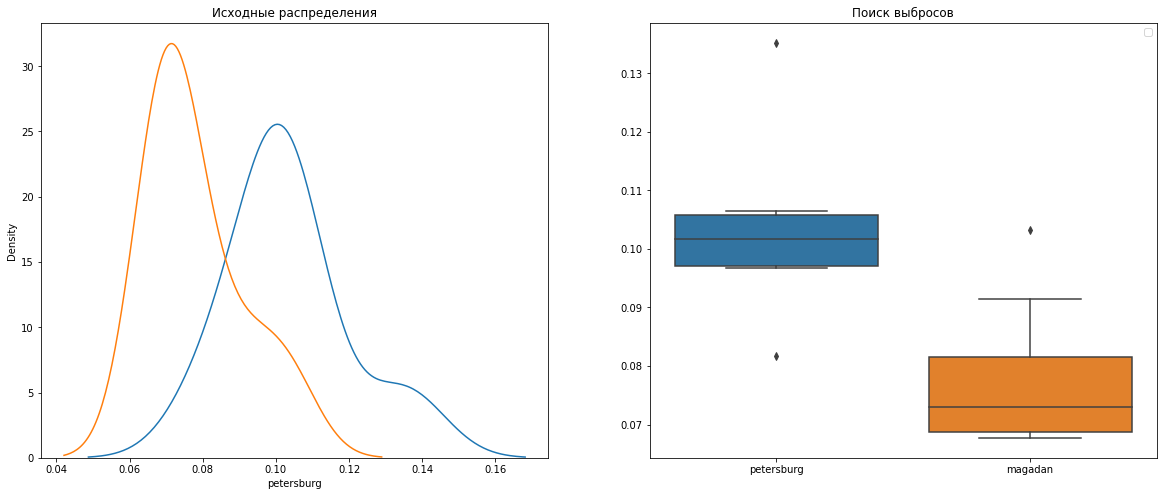

In [213]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 8))
ax1.set_title('Исходные распределения')
ax2.set_title('Поиск выбросов')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(mussels['petersburg'], ax=ax1, label ='petersburg')
sns.kdeplot(mussels['magadan'], ax=ax1, label ='magadan')

# ищем выбросы
sns.boxplot(data=mussels[['petersburg', 'magadan']], ax=ax2)

plt.legend()

<ins>Выбор теста на корреляцию</ins>: данные по размеру мидий в разных городах не являются линейно зависимыми, плюс мы выяснили, что данные не распределены нормально. Значит корреляцию Пирсона исключаем. 

Рассматриваемые данные являются количественными, а не категориальными, значит X2-тест также исключаем.

При этом на графиках видны выбросы в данных. Чтобы не проводить очистку, а сразу показать взаимосвязь между признаками, корреляцию Спирмана исключим и используем <b>корреляцию Кендала<b>.


In [214]:
H0_corr = 'Между данными отсутствует зависимость'
Ha_corr = 'Между данными существует зависимость'
alpha_corr = 0.05

In [215]:
from scipy.stats import kendalltau
tau, p_value = kendalltau(mussels['petersburg'], mussels['magadan'], nan_policy='omit')
print(tau, p_value)

if p_value>alpha_corr:
    print(f"{p_value:.3f} > {alpha_corr}. Мы не можем отвергнуть нулевую гипотезу. {H0_corr}.")
else:
    print(f"{p_value:.3f} <= {alpha_corr}. Мы отвергаем нулевую гипотезу. {H0_corr}.")

0.14285714285714285 0.7726190476190476
0.773 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Между данными отсутствует зависимость.


<ins>Вывод:</ins> между данными нет корреляции. И было бы странно, если бы были :)

#### Тест на сравнение выборок
Ответьте на вопрос: <b>Какова разница в среднем размере мидии в зависимости от города-производителя</b>

<ins>Выбор теста на сравнение выборок:</ins> 
Так как данные у нас не распределены нормально, то необходимо выбирать из непараметрических тестов.
* независимая переменная "город-производитель": категориальная переменная, 1 группа
* зависимая переменная "средний размер мидий": количественная, разные совокупности

Вывод: нам подходит <b>сумма рангов Уилкоксона</b>

In [216]:
from scipy.stats import mannwhitneyu

In [217]:
H0_mann_mussels = 'Нет значимой разницы между средним размером раковины мидий в Санкт-Петербурге и Магадане'
Ha_mann_mussels = 'Есть значимая разница между средним размером раковины мидий в Санкт-Петербурге и Магадане'
alpha_mann_mussels = 0.05

In [218]:
_, p_mann_mussels = mannwhitneyu(mussels['petersburg'], mussels['magadan'], nan_policy='omit')

if p_mann_mussels>alpha_mann_mussels:
  print(f"{p_mann_mussels:.3f} > {alpha_mann_mussels}. Мы не можем отвергнуть нулевую гипотезу. {H0_mann_mussels}")
else:
  print(f"{p_mann_mussels:.3f} <= {alpha_mann_mussels}. Мы отвергаем нулевую гипотезу. {Ha_mann_mussels}")

0.006 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в Санкт-Петербурге и Магадане


<ins>Вывод:</ins> как и в сравнении данных по трём городам, есть разница между размером раковин мидий в Санкт-Петербурге и Магадане. Но она близка к выбранному уровню статистической значимости. И если повысить статистическую мощность и выбрать уровень значимости хотя бы в alpha_mann_mussels = 0.06, то в этом случае отвергнуть нулевую гипотезу мы уже не сможем.

# Бонус

Скачаем датасет, содержащий информацию по давлению 120 человек.



In [219]:
!wget https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv

zsh:1: command not found: wget


In [220]:
data = pd.read_csv('data/blood_pressure.csv')

In [221]:
print('Размер выборки: ', data.shape)

Размер выборки:  (120, 5)


In [222]:
data.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


## Z-тест

Проведем Z-тест для проверки двух независимых групп данных на равенство средних значений выборок.

In [223]:
from statsmodels.stats import weightstats

In [224]:
_ ,p = weightstats.ztest(data['bp_before'], x2=data['bp_after'], value=0,alternative='two-sided')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")

0.002162306611369422
Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.


## Z-тест на пропорцию

Z-критерий одной пропорции используется для сравнения наблюдаемой пропорции с теоретической.

В этом тесте используются следующие нулевые гипотезы:

$H_0: p = p_0$ (доля мужчин, предоставивших данные о своем давлении, равна гипотетической пропорции $p_0$)

Альтернативная гипотеза может быть двусторонней, левосторонней или правосторонней:

$H_1 (двусторонний): p ≠ p_0$ (доля мужчин не равна некоторому гипотетическому значению $p_0$)
$H_1 (левосторонний): p < p_0$ (доля мужчин меньше некоторого гипотетического значения $p_0$)
$H_1 (правосторонний): p > p_0$ (доля мужчин больше некоторого гипотетического значения $p_0$)

Предположим, что доля мужчин в нашем датачете равна 40%.

$p_0$: гипотетическая доля мужчин = 0.40

$x$: число мужчин в выборке мужчин: `len(data[data.sex == 'Male'])`

$n$: размер выборки = `len(data)`

Покажем, как использовать функцию `proportions_ztest` для выполнения  **z-теста**:

In [225]:
p_0 = 0.4
n = len(data)
x = len(data[data.sex == 'Male'])

print(n, x)

120 60


In [226]:
from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)

In [227]:
if p < 0.05:
    print("Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.
